Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World!

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

The Data
They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

crimes.csv

Column	Description

'DR_NO'	Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits.

'Date Rptd'	Date reported - MM/DD/YYYY.

'DATE OCC'	Date of occurrence - MM/DD/YYYY.

'TIME OCC'	In 24-hour military time.

'AREA NAME'	The 21 Geographic Areas or Patrol Divisions are also given a name
 designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.

'Crm Cd Desc'	Indicates the crime committed.

'Vict Age'	Victim's age in years.

'Vict Sex'	Victim's sex: F: Female, M: Male, X: Unknown.

'Vict Descent'	Victim's descent:
A - Other Asian

B - Black

C - Chinese

D - Cambodian

F - Filipino

G - Guamanian

H - Hispanic/Latin/Mexican

I - American Indian/Alaskan Native

J - Japanese

K - Korean

L - Laotian

O - Other

P - Pacific Islander

S - Samoan

U - Hawaiian

V - Vietnamese

W - White

X - Unknown

Z - Asian Indian

'Weapon Desc'	Description of the weapon used (if applicable).

'Status Desc'	Crime status.

'LOCATION'	Street address of the crime.

## Project Instructions:
Explore the crimes.csv dataset and use your findings to answer the following questions:
1. Which hour has the highest frequency of crimes? Store as an integer variable called **peak_crime_hour**.
2. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called **peak_night_crime_location**.
3. Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called **victim_ages**, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

## How to approach the project
1. **Finding the frequencies of crimes by the hour of occurrence:** You can extract the hours from the relevant column, convert it to integer data type, and plot the frequencies.

2. **Identifying the area with the most night crime:** You'll need to filter the data for the relevant hours and count the number of crimes by area.

3. **Crimes by age group:** Bin and label victim age into the provided groups, then produce a pandas Series detailing how many crimes were committed against each age group.

In [1]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("E:\\Data Science Course\\Projects\\6. Analyzing Crimes in Los Angeles\\crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


In [2]:
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR,17
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6


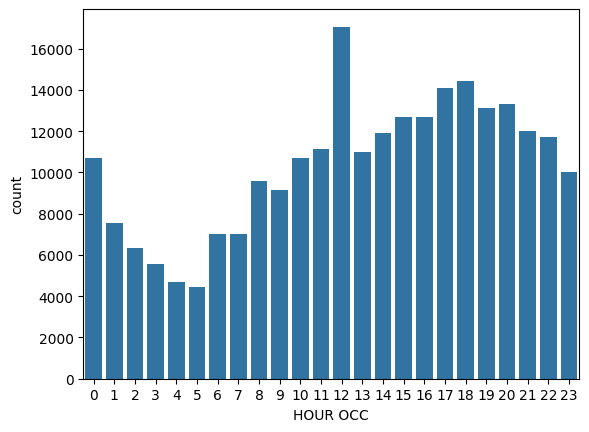

In [3]:
#A countplot to find the largest frequency of crimes by hour
sns.countplot(data=crimes, x="HOUR OCC")
plt.show()

In [4]:
peak_crime_hour = 12

In [6]:
night_time = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]

peak_night_crime_location = night_time.groupby("AREA NAME", as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC", ascending=False).iloc[0]["AREA NAME"]

print(f"The area with the largest volume of night crime is {peak_night_crime_location}")


The area with the largest volume of night crime is Central


In [7]:
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

In [8]:
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"], bins=age_bins, labels=age_labels)

In [9]:
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)

Age Bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64
